## Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import time
import numpy as np
import random
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Load Dataset

In [2]:
data = pd.read_csv('data/Swarm_Behaviour.csv')

In [3]:
data

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.00,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.00,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.30,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.00,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.00,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,-225.85,128.99,12.19,-7.56,-1.00,0.00,0.0,0.0,0.00,0.00,...,-5.06,-1.00,-1.00,-3.99,0.21,0.00,0.00,17,1,0.0
23305,-1352.02,-233.03,-0.86,-4.37,-0.07,-0.55,0.0,0.0,0.28,0.02,...,-12.41,-0.15,-0.70,0.00,0.00,0.02,0.07,69,1,0.0
23306,-1360.61,-778.11,-2.89,-1.17,0.00,0.00,0.0,0.0,0.00,0.00,...,-14.78,0.00,0.00,0.00,0.00,0.00,0.00,20,1,0.0
23307,987.11,615.69,-5.61,-2.92,-1.00,-1.00,0.0,0.0,0.00,0.00,...,9.78,-1.00,-1.00,0.00,0.00,0.00,0.00,29,0,0.0


## Data Processing

#### Label Encoding

In [4]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data = data.apply(le.fit_transform)

In [5]:
data.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,10795,9519,240,735,100,98,372,351,253,245,...,83,100,100,356,332,212,226,28,0,0
1,8651,9096,1432,899,100,98,372,351,253,245,...,855,100,100,356,332,212,226,4,0,0
2,8774,6531,1596,558,100,98,372,351,271,219,...,346,100,100,356,332,201,196,15,1,0
3,9514,698,1286,2016,83,196,372,351,253,245,...,2108,74,194,356,332,212,226,16,0,0
4,15926,16031,1000,1922,0,193,372,351,253,245,...,2286,1,100,588,648,212,226,12,0,0


#### Feature Scaling

In [6]:
from sklearn import preprocessing
X = data.values
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(X)
df = pd.DataFrame(data_scaled)

In [7]:
df.columns = data.columns

In [8]:
df.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,0.634664,0.567249,0.105125,0.299389,0.546448,0.497462,0.529915,0.500713,0.513185,0.494949,...,0.034411,0.515464,0.507614,0.509299,0.501511,0.467991,0.475789,0.205882,0.000000,0.0
1,0.508613,0.542042,0.627245,0.366191,0.546448,0.497462,0.529915,0.500713,0.513185,0.494949,...,0.354478,0.515464,0.507614,0.509299,0.501511,0.467991,0.475789,0.029412,0.000000,0.0
2,0.515845,0.389190,0.699080,0.227291,0.546448,0.497462,0.529915,0.500713,0.549696,0.442424,...,0.143449,0.515464,0.507614,0.509299,0.501511,0.443709,0.412632,0.110294,0.015625,0.0
3,0.559351,0.041595,0.563294,0.821181,0.453552,0.994924,0.529915,0.500713,0.513185,0.494949,...,0.873964,0.381443,0.984772,0.509299,0.501511,0.467991,0.475789,0.117647,0.000000,0.0
4,0.936328,0.955307,0.438020,0.782892,0.000000,0.979695,0.529915,0.500713,0.513185,0.494949,...,0.947761,0.005155,0.507614,0.841202,0.978852,0.467991,0.475789,0.088235,0.000000,0.0


#### Define Target and Feature Variables

In [9]:
#feature variables
X = df.drop(['Swarm_Behaviour'], axis=1).values

#target variable
y = df['Swarm_Behaviour'].values

#### Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

## Data Analysis

In [11]:
df.shape

(23309, 2401)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 2401 entries, x1 to Swarm_Behaviour
dtypes: float64(2401)
memory usage: 427.0 MB


In [13]:
df["Swarm_Behaviour"].value_counts()

0.0    15355
1.0     7954
Name: Swarm_Behaviour, dtype: int64

C:\Users\syedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Swarm_Behaviour', ylabel='count'>

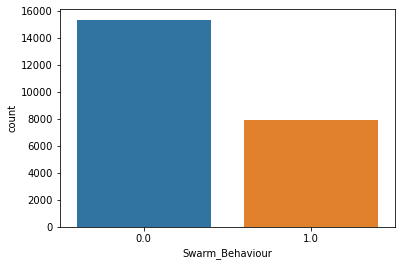

In [14]:
sns.countplot(df['Swarm_Behaviour'])

## Classification

### In this work, at first classification models has been applied without optimization
#### Classifier Used-
- Logistic Regression
- Support Vector Machine
- Decision Tree
- Random Forrest
- Neural Networks

In [15]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(solver='lbfgs', max_iter=2000)

# Support Vector Machines
from sklearn.svm import SVC
models['Support Vector Machines'] = SVC(kernel='linear')

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Neural Networks
from sklearn.neural_network import MLPClassifier
models['Neural Networks'] = MLPClassifier()

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

accuracy = {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)

In [17]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy'])
df_model['Accuracy'] = accuracy.values()

df_model

,Accuracy
Logistic Regression,0.880023
Support Vector Machines,0.877020
Decision Trees,0.872015
Random Forest,0.870013
K-Nearest Neighbor,0.888460
Neural Networks,0.894323


## Particle Swarm Optimization

In [18]:
# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    fold = opts['fold']
    xt = fold['xt']
    yt = fold['yt']
    xv = fold['xv']
    yv = fold['yv']
    # number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain = xt[:, x == 1]
    ytrain = yt.reshape(num_train)
    xvalid = xv[:, x == 1]
    yvalid = yv.reshape(num_valid)
    # Training
    mdl     = LinearRegression()
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    error   = mean_squared_error(yvalid, ypred, squared=False)
    
    return error

In [19]:
# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # parameters
    alpha = 0.99
    beta = 1 - alpha
    # original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost = alpha * error + beta * (num_feat / max_feat)
        
    return cost

In [20]:
def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * random.random()        
    
    return X

In [21]:
def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
        
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * random.random()
        
    return V, Vmax, Vmin

In [22]:
def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin

In [23]:
def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    return x

In [24]:
def jfs(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor
    
    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2'] 
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = random.random()
                r2     = random.random()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
    
                
    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return pso_data

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 23)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

In [26]:
c1  = 2         # cognitive factor
c2  = 2         # social factor 
w   = 0.9       # inertia weight
k     = 5     # k-value in KNN
N     = 20    # number of population
T     = 100   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

Iteration: 1
Best (PSO): 0.24306961391265905
Iteration: 2
Best (PSO): 0.24306961391265905
Iteration: 3
Best (PSO): 0.24079219948223302
Iteration: 4
Best (PSO): 0.24079219948223302
Iteration: 5
Best (PSO): 0.24079219948223302
Iteration: 6
Best (PSO): 0.24079219948223302
Iteration: 7
Best (PSO): 0.24069079443801605
Iteration: 8
Best (PSO): 0.24069079443801605
Iteration: 9
Best (PSO): 0.24069079443801605
Iteration: 10
Best (PSO): 0.24069079443801605
Iteration: 11
Best (PSO): 0.24069079443801605
Iteration: 12
Best (PSO): 0.24069079443801605
Iteration: 13
Best (PSO): 0.24069079443801605
Iteration: 14
Best (PSO): 0.24069079443801605
Iteration: 15
Best (PSO): 0.24069079443801605
Iteration: 16
Best (PSO): 0.24069079443801605
Iteration: 17
Best (PSO): 0.2399800594805869
Iteration: 18
Best (PSO): 0.23959625014395627
Iteration: 19
Best (PSO): 0.23959625014395627
Iteration: 20
Best (PSO): 0.23959625014395627
Iteration: 21
Best (PSO): 0.23959625014395627
Iteration: 22
Best (PSO): 0.2395962501439562

C:\Users\syedi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RMSE: 0.33107342027050374
Feature Size: 1170


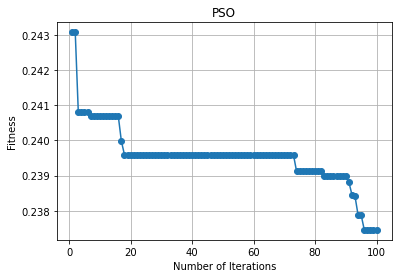

In [27]:
# perform feature selection
start_time = time.time()
fmdl  = jfs(X_train, y_train, opts)

sf    = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl2       = LogisticRegression()
mdl2.fit(x_train, y_train)

# accuracy
y_pred    = mdl2.predict(x_valid)
RMSE       = mean_squared_error(y_valid, y_pred, squared=False)
print("RMSE:", RMSE)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

In [28]:
fmdl['sf']

array([   1,    4,    5, ..., 2392, 2394, 2396])

In [29]:
#X_test = X_test.drop(['default.payment.next.month'], axis=1).iloc[:,fmdl['sf']]
new_data = df.drop(['Swarm_Behaviour'], axis=1)
new_data = df.iloc[:,fmdl['sf']]

In [30]:
new_data

,y1,xA1,yA1,xS1,nS1,x2,y2,xVel2,xA2,nS2,...,x199,y199,xVel199,yVel199,yS199,nAC199,nS199,xA200,xS200,xC200
0,0.567249,0.546448,0.497462,0.529915,0.000000,0.375462,0.271498,0.535117,0.540984,0.000000,...,0.824240,0.129155,0.840852,0.149560,0.538462,0.251799,0.04,0.515464,0.509299,0.467991
1,0.542042,0.546448,0.497462,0.529915,0.000000,0.452232,0.330157,0.748686,0.540984,0.000000,...,0.903323,0.619802,0.286967,0.427315,0.538462,0.035971,0.00,0.515464,0.509299,0.467991
2,0.389190,0.546448,0.497462,0.529915,0.000000,0.066272,0.596891,0.870043,0.540984,0.000000,...,0.542563,0.088764,0.890560,0.551320,0.538462,0.043165,0.00,0.515464,0.509299,0.443709
3,0.041595,0.453552,0.994924,0.529915,0.000000,0.459562,0.792044,0.499761,0.491803,0.000000,...,0.461169,0.615990,0.405180,0.881022,0.538462,0.100719,0.00,0.381443,0.509299,0.467991
4,0.955307,0.000000,0.979695,0.529915,0.000000,0.224034,0.143699,0.037267,0.005464,0.000000,...,0.338665,0.187239,0.989557,0.196062,0.538462,0.215827,0.04,0.005155,0.841202,0.467991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,0.620464,0.000000,0.497462,0.529915,0.000000,0.010146,0.035553,0.386049,0.540984,0.000000,...,0.150347,0.191827,0.287385,0.049434,0.538462,0.064748,0.00,0.005155,0.148784,0.467991
23305,0.446755,0.508197,0.218274,0.529915,0.000000,0.644009,0.713554,0.526995,0.491803,0.015873,...,0.431313,0.611402,0.650794,0.073733,0.354396,0.834532,0.04,0.438144,0.509299,0.472406
23306,0.101663,0.546448,0.497462,0.529915,0.034483,0.363615,0.049607,0.532728,0.540984,0.000000,...,0.226882,0.478017,0.903509,0.101382,0.538462,0.330935,0.00,0.515464,0.509299,0.467991
23307,0.832132,0.000000,0.000000,0.529915,0.000000,0.037359,0.151441,0.707119,0.005464,0.000000,...,0.481962,0.359228,0.214286,0.858400,0.975275,0.057554,0.04,0.005155,0.509299,0.467991


## Classification after Optimization

In [31]:
#feature variables
X = new_data.values

#target variable
y = df['Swarm_Behaviour'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

print("Shape of X_train:", X.shape)
print("Shape of y_train:", y.shape)

Shape of X_train: (23309, 1170)
Shape of y_train: (23309,)


In [32]:
models1 = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models1['Logistic Regression'] = LogisticRegression(solver='lbfgs', max_iter=2000)

# Support Vector Machines
from sklearn.svm import SVC
models1['Support Vector Machines'] = SVC(kernel='linear')

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models1['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models1['Random Forest'] = RandomForestClassifier()


# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models1['K-Nearest Neighbor'] = KNeighborsClassifier()

# Neural Networks
from sklearn.neural_network import MLPClassifier
models1['Neural Networks'] = MLPClassifier()


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

accuracy1 = {}

for key in models1.keys():
    
    # Fit the classifier
    models1[key].fit(X_train, y_train)
    
#     # Make predictions
    predictions1 = models1[key].predict(X_test)
    
#     # Calculate metrics
    accuracy1[key] = accuracy_score(predictions1, y_test)

In [34]:
df_model1 = pd.DataFrame(index=models1.keys(), columns=['Accuracy'])
df_model1['Accuracy'] = accuracy1.values()

df_model1

,Accuracy
Logistic Regression,0.889747
Support Vector Machines,0.888460
Decision Trees,0.872015
Random Forest,0.871443
K-Nearest Neighbor,0.888889
Neural Networks,0.891177


In [35]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h3 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)


In [36]:
display_side_by_side(df_model,df_model1, titles=['Classification without PSO','Classification with PSO'])

,Accuracy
Logistic Regression,0.880023
Support Vector Machines,0.877020
Decision Trees,0.872015
Random Forest,0.870013
K-Nearest Neighbor,0.888460
Neural Networks,0.894323
,Accuracy
Logistic Regression,0.889747
Support Vector Machines,0.888460
Decision Trees,0.872015
